# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

---
## 2. Load data

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\clean_data_after_eda.csv")
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [4]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731,59.275820,36.583870,8.438721,1
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,1
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        14605 non-null  object        
 1   channel_sales             14605 non-null  object        
 2   cons_12m                  14605 non-null  int64         
 3   cons_gas_12m              14605 non-null  int64         
 4   cons_last_month           14605 non-null  int64         
 5   date_activ                14605 non-null  datetime64[ns]
 6   date_end                  14605 non-null  datetime64[ns]
 7   date_modif_prod           14605 non-null  datetime64[ns]
 8   date_renewal              14605 non-null  datetime64[ns]
 9   forecast_cons_12m         14605 non-null  float64       
 10  forecast_cons_year        14605 non-null  int64         
 11  forecast_discount_energy  14605 non-null  float64       
 12  forecast_meter_ren

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [8]:
price_df = pd.read_csv(r"C:\Users\HP\Downloads\price_data.csv")

In [9]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [10]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [11]:
diff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               16096 non-null  object 
 1   offpeak_diff_dec_january_energy  16096 non-null  float64
 2   offpeak_diff_dec_january_power   16096 non-null  float64
dtypes: float64(2), object(1)
memory usage: 503.0+ KB


In [12]:
###Merging the two datasets to feature engineer based on a single comprehensive dataset
df = pd.merge(df,diff,on='id')

In [13]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,44.444710,0.000000,0.000000,44.584882,0.000000,0.000000,0,-0.008653,0.177779
14601,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.070990,59.173468,36.490689,8.367731,59.275820,36.583870,8.438721,1,-0.007395,0.236694
14602,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,1,-0.006192,0.162916
14603,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779


In [14]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,...,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085,...,0.028568,43.058161,9.483665,6.115566,43.197473,9.534975,6.144134,0.097159,-0.004566,0.278502
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140,...,0.036376,4.668200,12.139506,7.830408,4.683855,12.179014,7.866460,0.296184,0.012049,1.349277
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.148477,-44.266931
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,0.000000,40.728885,0.000000,0.000000,40.848595,0.000000,0.000000,0.000000,-0.007829,0.000004
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378,...,0.000000,44.355820,0.000000,0.000000,44.502379,0.084305,0.000000,0.000000,-0.005344,0.162916
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378,...,0.073719,44.444710,24.437330,16.291555,44.592310,24.537821,16.365180,0.000000,-0.003520,0.177779
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,0.103502,59.444710,36.490689,17.291555,59.720948,36.610036,17.382386,1.000000,0.168958,40.728885


###### Since the data is for the year 2015, we can find the tenure of a company's association with PowerCo, the time remaining before the currently active contract ends, time since last product modifications, and time since last renewal
We will be moving forward with an assumption of the current/analysis date being 2016-03-31 as the dataset provides us with information whether a customer churned over the next 3 months following the dataset date values for prices

In [15]:
current_date =  pd.to_datetime('2016-03-31')

In [16]:
df['total_tenure'] = (current_date-df['date_activ']).dt.days
df['Days_till_termination'] = (df['date_end']-current_date).dt.days

In [17]:
df['Days_since_last_mod'] = (current_date-df['date_modif_prod']).dt.days
df['Days_since_last_renewal'] = (current_date-df['date_renewal']).dt.days

In [18]:
##On second thought, since our current date is an assumption, measuring the days till termination will not be a useful feature in any way
df.drop(['date_activ','date_end','date_modif_prod','date_renewal','Days_till_termination'],axis=1,inplace=True)

In [19]:
#Let's check out the attributes we have right now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               14605 non-null  object 
 1   channel_sales                    14605 non-null  object 
 2   cons_12m                         14605 non-null  int64  
 3   cons_gas_12m                     14605 non-null  int64  
 4   cons_last_month                  14605 non-null  int64  
 5   forecast_cons_12m                14605 non-null  float64
 6   forecast_cons_year               14605 non-null  int64  
 7   forecast_discount_energy         14605 non-null  float64
 8   forecast_meter_rent_12m          14605 non-null  float64
 9   forecast_price_energy_p1         14605 non-null  float64
 10  forecast_price_energy_p2         14605 non-null  float64
 11  forecast_price_pow_p1            14605 non-null  float64
 12  has_gas           

We can get the difference between the forecasted price for the upcoming period and the mean annual price for 2015 to get an idea of how prices might change in the next period. This may be an important predictor as expectations of higher prices than last year would push companies to churn

In [20]:
df['Diff_p1'] = df['forecast_price_energy_p1']-df['mean_year_price_p1_var']
df['Diff_p2'] = df['forecast_price_energy_p2']-df['mean_year_price_p2_var']
df['Diff_pow'] = df['forecast_price_pow_p1']-df['mean_year_price_p1_fix']

We can also check the same for the energy consumption, by subtracting forecasts of the next 12 months and the calendar year with past 12 months

In [21]:
df['Diff_energy_cal'] = df['forecast_cons_year']-df['cons_12m']
df['Diff_energy_12m'] = df['forecast_cons_12m'] - df['cons_12m']

#### To deal with categorical variables, we need to get dummy variables for them

###### Has Gas

In [22]:
df['has_gas'] = df['has_gas'].replace({'t': 1, 'f': 0})

In [23]:
##Drop the ID column since it won't help us in predictions
df.drop('id',axis=1,inplace=True)

###### Other Categorical Columns

In [24]:
df = pd.get_dummies(df,drop_first=True)

All categorical data has been converted to dummies, and by our understanding, the feature engineering has also been done. Therefore, let's take one more look at the summary of our dataset before moving to modelling

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 68 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cons_12m                                        14605 non-null  int64  
 1   cons_gas_12m                                    14605 non-null  int64  
 2   cons_last_month                                 14605 non-null  int64  
 3   forecast_cons_12m                               14605 non-null  float64
 4   forecast_cons_year                              14605 non-null  int64  
 5   forecast_discount_energy                        14605 non-null  float64
 6   forecast_meter_rent_12m                         14605 non-null  float64
 7   forecast_price_energy_p1                        14605 non-null  float64
 8   forecast_price_energy_p2                        14605 non-null  float64
 9   forecast_price_pow_p1                  

Importing all necessary libraries. Since we are using a RandomForest model,we will require GridSearch for Cross-Validation of the model. We have also loaded some commonly used metrics to measure the quality of our model

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [27]:
###Splitting the data into train and test data, and separating the dependent variable churn with the other variables

In [28]:
X = df.drop('churn',axis=1)
y = df['churn']

Given the fact that our data has got far more un-churned customers than those who have churned, it is imperative to apply stratified sampling to ensure some level of balance between the outcomes 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y ,random_state=42)

Building the model with a specified numbers of trees(estimators) in a random forest

In [31]:
model = RandomForestClassifier(n_estimators=500)

In [32]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

Making Predictions on the model using the test dataset

In [36]:
pred = model.predict(X_test)

Measuring the accuracy and metrics to evaluate performance of the model predictions

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3297
           1       0.84      0.08      0.14       355

    accuracy                           0.91      3652
   macro avg       0.88      0.54      0.55      3652
weighted avg       0.90      0.91      0.87      3652



In [39]:
print(confusion_matrix(y_test,pred))

[[3292    5]
 [ 328   27]]


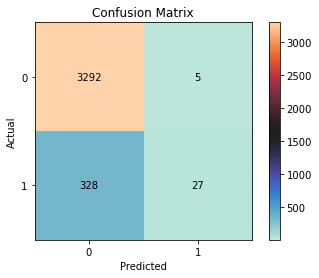

In [41]:
confusion_matrix = np.array([[3292, 5],
                             [328, 27]])

# Define class labels
classes = ['0', '1']

# Create the heatmap
plt.imshow(confusion_matrix, interpolation='nearest',cmap="icefire")
plt.colorbar()

# Label the rows and columns
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add cell values
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(confusion_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

# Add axis labels and a title`
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

Let's check which features came out to be the most import in predictions

In [85]:
Importance = pd.DataFrame({'Feature':X_train.columns,
                           'Importance':model.feature_importances_}).sort_values(by="Importance",
                                                                                 ascending=False)

In [92]:
Importance.head(60)

,Feature,Importance
6,forecast_meter_rent_12m,0.043951
47,total_tenure,0.043230
15,net_margin,0.041963
12,margin_gross_pow_ele,0.040628
13,margin_net_pow_ele,0.040187
54,Diff_energy_12m,0.039753
53,Diff_energy_cal,0.039623
0,cons_12m,0.038765
3,forecast_cons_12m,0.037374
48,Days_since_last_mod,0.037073


Apparently the forecasted rent of the meter came out to be the best feature in predictions, followed by tenure. Although no individual feature has a very high influence on its own

Using RandomizedSearch to Cross Validate the model

We will split the train data again to get a validation dataset, and then use Predefined split so that Randomized Search CV can identify train data with validation data

In [44]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2,stratify=y_train ,random_state=42)

In [47]:
split_index = [0 if x in X_val.index else -1 for x in X_train.index] ##This list will allow RandomizedSearch to identify which data point has been split into val and tr

In [48]:
from sklearn.model_selection import PredefinedSplit

In [49]:
cv_params = {
    'n_estimators': [50, 100, 200, 500, 1000],  # Number of trees in the forest
    'max_depth': [5, 10, 15, 20, 25, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15, 20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8, 16],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider for the best split
}
rf_model = RandomForestClassifier()

scoring = {'accuracy','precision','recall','f1'}

custom_split = PredefinedSplit(split_index)

rf_val = RandomizedSearchCV(rf_model,cv_params,scoring=scoring,cv=custom_split,refit='f1')

In [50]:
rf_val.fit(X_train,y_train)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1,  0, ..., -1, -1])),
                   estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200, 500,
                                                         1000]},
                   refit='f1',
                   scoring={'recall', 'precision', 'accuracy', 'f1'})

Let's check out what parameters did our Cross Validation model determine to be the best

In [51]:
rf_val.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [53]:
rf_val.best_score_

0.07174887892376682

In [55]:
predictions = rf_val.predict(X_test)

In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3297
           1       0.83      0.08      0.15       355

    accuracy                           0.91      3652
   macro avg       0.87      0.54      0.55      3652
weighted avg       0.90      0.91      0.87      3652



In [57]:
print(confusion_matrix(y_test,predictions))

[[3291    6]
 [ 325   30]]


There doesn't seem to be a much significant improvement over the previous one. The unbalanced distribution of churned vs non churned customers is clearly causing underperformance in the prediction of churns

#### While further experimentation is clearly required,this comprehsensive analysis suggests that prices and price sensitivity are not strong predictors of customer churn. While forecasted meter rent is the strongest feature, individually its influence is minute. This infers that the client's proposal of a 20% discount may not actually be all that effective in prevention of customer churn. Although the reduction of the meter rental rate is a possibility perhaps worth considering.